# Dip buy test

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
from IPython.display import clear_output

In [12]:
import os
time.sleep(3)
os.system("printf '\a'")

0

In [12]:
df = pd.read_csv("../data/tpsl-test-busd.csv")

In [14]:
from ta.trend import SMAIndicator
from ta.volatility import BollingerBands

import sys
sys.path.insert(0, '..')
import useful_functions as uf

i = SMAIndicator(df.close, window=5000) #50
df["test"] = i.sma_indicator()
sma = uf.get_rate(i.sma_indicator())
df["sma"] = list(map(lambda x: x*10, sma))

i = BollingerBands(df.close, window=5000, window_dev=0.9)
df["bb"] = i.bollinger_lband()

In [15]:
df = df[:]

In [24]:
def strategy(tp_pct, sl_pct):
    """for optimizing paramaters"""
    btc = None
    price = None
    tp = None
    sl = None

    total = 100
    total_and_btc = None
    amt = 20

    plot = [] #[None, ]

    for i in range(len(df)):
        close = df.iloc[i].close
        high = df.iloc[i].high
        low = df.iloc[i].low
        target = df.iloc[i].target
        if sl and low<sl: #Stop loss hit, sell
            plot.append(-sl)
            total += btc*close*0.999
            btc = None
            price = None
            tp = None
            sl = None
        elif tp and high>tp: #take profit hit, sell
            plot.append(-tp)
            total += btc*close*0.999
            btc = None
            price = None
            tp = None
            sl = None
        elif not tp and not sl and target: #Target says to buy and can buy:
            btc = amt*0.999/close
            price = close
            tp = (1+tp_pct)*close
            sl = (1-sl_pct)*close
            total -= amt
            plot.append(price)
        else:
            plot.append(None)
        b = amt if btc != None else 0
        total_and_btc = total + b
    return total_and_btc

In [12]:
# strategy(0.01, 0.01)

In [26]:
d = {}

In [27]:
for i1 in [0.01, 0.015, 0.02, 0.025]:
    for i2 in [0.01, 0.015, 0.02, 0.025]:
        d["tp:" + str(i1) + " sl:" + str(i2)] = strategy(i1, i2)
        clear_output()
        print(max(d.values()))
        print(d)

110.89922823461013
{'tp:0.005 sl:0.005': 82.7258982043383, 'tp:0.005 sl:0.01': 94.12930426264066, 'tp:0.005 sl:0.015': 98.87110368730481, 'tp:0.005 sl:0.02': 100.38052097547262, 'tp:0.005 sl:0.025': 100.39322146911371, 'tp:0.005 sl:0.03': 98.91699529005012, 'tp:0.01 sl:0.005': 94.48352353730075, 'tp:0.01 sl:0.01': 103.29456440518672, 'tp:0.01 sl:0.015': 105.02724370373645, 'tp:0.01 sl:0.02': 107.15600332890965, 'tp:0.01 sl:0.025': 107.27000820551228, 'tp:0.01 sl:0.03': 104.463222427411, 'tp:0.015 sl:0.005': 97.8499501131605, 'tp:0.015 sl:0.01': 106.39137455572356, 'tp:0.015 sl:0.015': 105.25452038635139, 'tp:0.015 sl:0.02': 109.6234009783987, 'tp:0.015 sl:0.025': 110.89922823461013, 'tp:0.015 sl:0.03': 108.63217764635515, 'tp:0.02 sl:0.005': 99.81148212606732, 'tp:0.02 sl:0.01': 105.072785107097, 'tp:0.02 sl:0.015': 105.5444375890566, 'tp:0.02 sl:0.02': 104.39568088103645, 'tp:0.02 sl:0.025': 107.6952614721099, 'tp:0.02 sl:0.03': 103.58120155354257, 'tp:0.025 sl:0.005': 98.211625139941

In [16]:
tp_pct = 0.03
sl_pct = 0.02

btc = None
price = None
tp = None
sl = None

buy = False

total = 100
total_and_btc = None
total_plot = []
amt = int(total*0.5)

# cooldown = 0

plot = [] #[None, ]

for i in range(len(df)):

    close = df.iloc[i].close
    high = df.iloc[i].high
    low = df.iloc[i].low
    target = df.iloc[i].target
    bb = df.iloc[i].bb
    test = df.iloc[i].test

    if sl and low<sl: #Stop loss hit, sell
        plot.append(-sl)
        total += btc*close*0.999
        btc = None
        price = None
        tp = None
        sl = None
#         cooldown += 600
        
    elif tp and high>tp: #take profit hit, sell
        plot.append(-tp)
        total += btc*close*0.999
        btc = None
        price = None
        tp = None
        sl = None
#         buy=True
    elif not tp and not sl and target and close>test: #Target says to buy and can buy:
        btc = amt*0.999/close
        price = close
        tp = (1+tp_pct)*close
        sl = (1-sl_pct)*close
        total -= amt
        plot.append(price)
        buy = False
    else:
        plot.append(None)
    b = amt if btc != None else 0
    total_and_btc = total + b
    total_plot.append(total_and_btc)

NameError: name 'os' is not defined

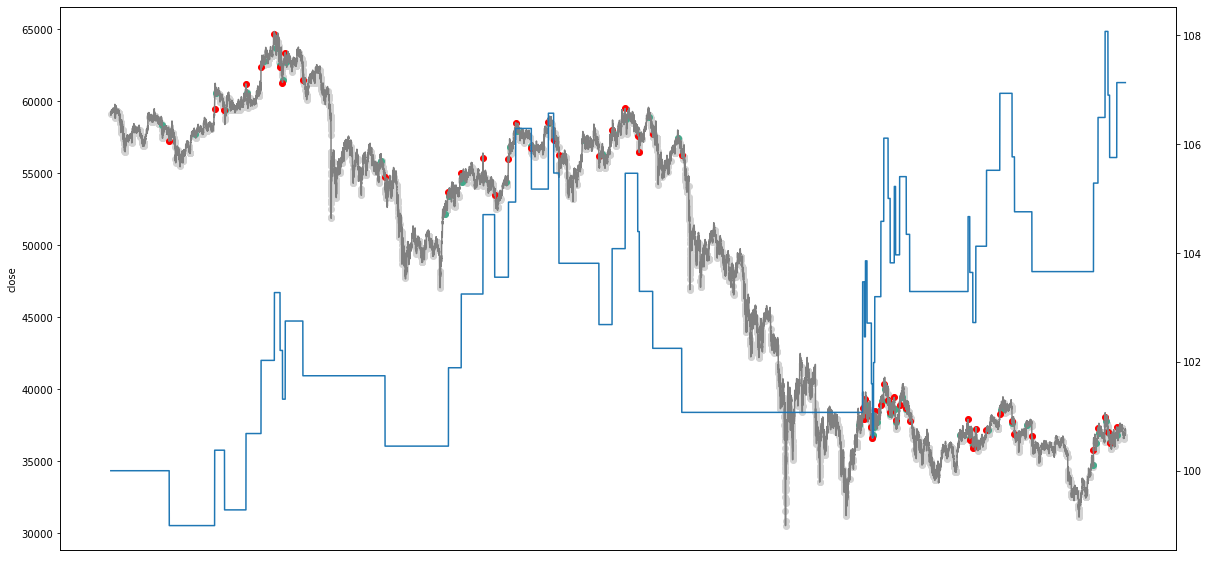

In [17]:
a = 0
b = 100000
fig,ax = plt.subplots(figsize=(20, 10))



plot_buy = list(map(lambda x: None if x == None or x<0 else x, plot[a:b]))
plot_sell = list(map(lambda x: None if x == None or x>0 else -x, plot[a:b]))
scatter_target = list(map(lambda x, c: c if x == 1 else None, df.target[a:b], df.close[a:b]))

# ax.plot(acc[a:b])

# ax1 = ax.twiny()
ax.scatter(range(b-a),
          scatter_target,
          color="lightgray")

ax.scatter(range(b-a), 
            plot_buy,
            color="#43aa8b")

ax.scatter(range(b-a), 
            plot_sell,
            color="red")



ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(list(df.close)[a:b],
        color="gray")
# ax.plot(list(df.high)[a:b],
#         color="lightgreen")
# ax.plot(list(df.low)[a:b],
#         color="pink")

ax1 = ax.twinx()
ax1.plot(total_plot[a:b])
# ax1.plot(usd[a:b])
# ax.plot(blimit[a:b], color="lightgray")
# ax.plot(slimit[a:b], color="lightgray")

# ax2 = ax.twinx()
# ax.plot(df.test[a:b])

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)
os.system("printf '\a'")

## Trailing tp

In [103]:
diff = list(map(lambda x, y, z: (x-y)/z, df.high, df.low, df.close))

In [107]:
# plt.plot(diff)

In [161]:
sl_pct = 0.01

btc = None
price = None
sl = None

buy = False

total = 100
total_and_btc = None
total_plot = []
amt = 20
# cooldown = 0
# restriction = 0
plot = [] #[None, ]

for i in range(len(df)):

    close = df.iloc[i].close
    high = df.iloc[i].high
    low = df.iloc[i].low
    target = df.iloc[i].target
    sma = df.iloc[i].sma
    test = df.iloc[i].test

    if sl and low<sl: #Stop loss hit, sell
        plot.append(-sl)
        new = btc*close*0.999
        total += new
        btc = None
        price = None
        sl = None
    elif not sl and target and close>test: #Target says to buy and can buy:

        btc = amt*0.999/close
        price = close
        sl = (1-sl_pct)*close
        total -= amt
        plot.append(price)
        buy = False
    else:
        plot.append(None)
    if sl and (1-sl_pct)*close>sl:
        sl = (1-sl_pct)*close
    b = amt if btc != None else 0
    total_and_btc = total + b
    total_plot.append(total_and_btc)